In [35]:
import tensorflow as tf 

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout
from tensorflow import keras

# 데이터 로드 및 전처리
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()



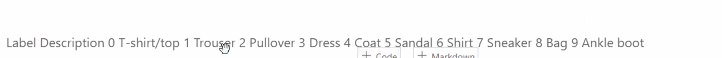

In [37]:
train_input.shape

(60000, 28, 28)

In [38]:
# train_input.ndim

In [39]:
# import cv2

# cv2.imshow('', train_input[0])
# cv2.waitKey()
# cv2.destroyAllWindows()

In [40]:
from sklearn.model_selection import train_test_split

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)



In [41]:
# train_input = train_input.reshape(train_input.shape[0], 28, 28, 1).astype('float32') / 255
# test_input = test_input.reshape(test_input.shape[0], 28, 28, 1).astype('float32') / 255
# train_target = to_categorical(train_target, 10)
# test_target = to_categorical(test_target, 10)

In [42]:

# 모델 정의
# 트랜스포트, 쳇gpt이해
model = Sequential()
model.add(
    Conv2D(32, kernel_size=3,
           activation='relu', 
           padding='same', 
           input_shape=(28,28,1))
) 
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(
    Conv2D(64, kernel_size=(3,3),
           activation='relu', 
           padding='same')
) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) 
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4)) # 1차원 과적합 때문에
model.add(Dense(10, activation='softmax')) 




c:\anaconda3\envs\practice_mldl\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

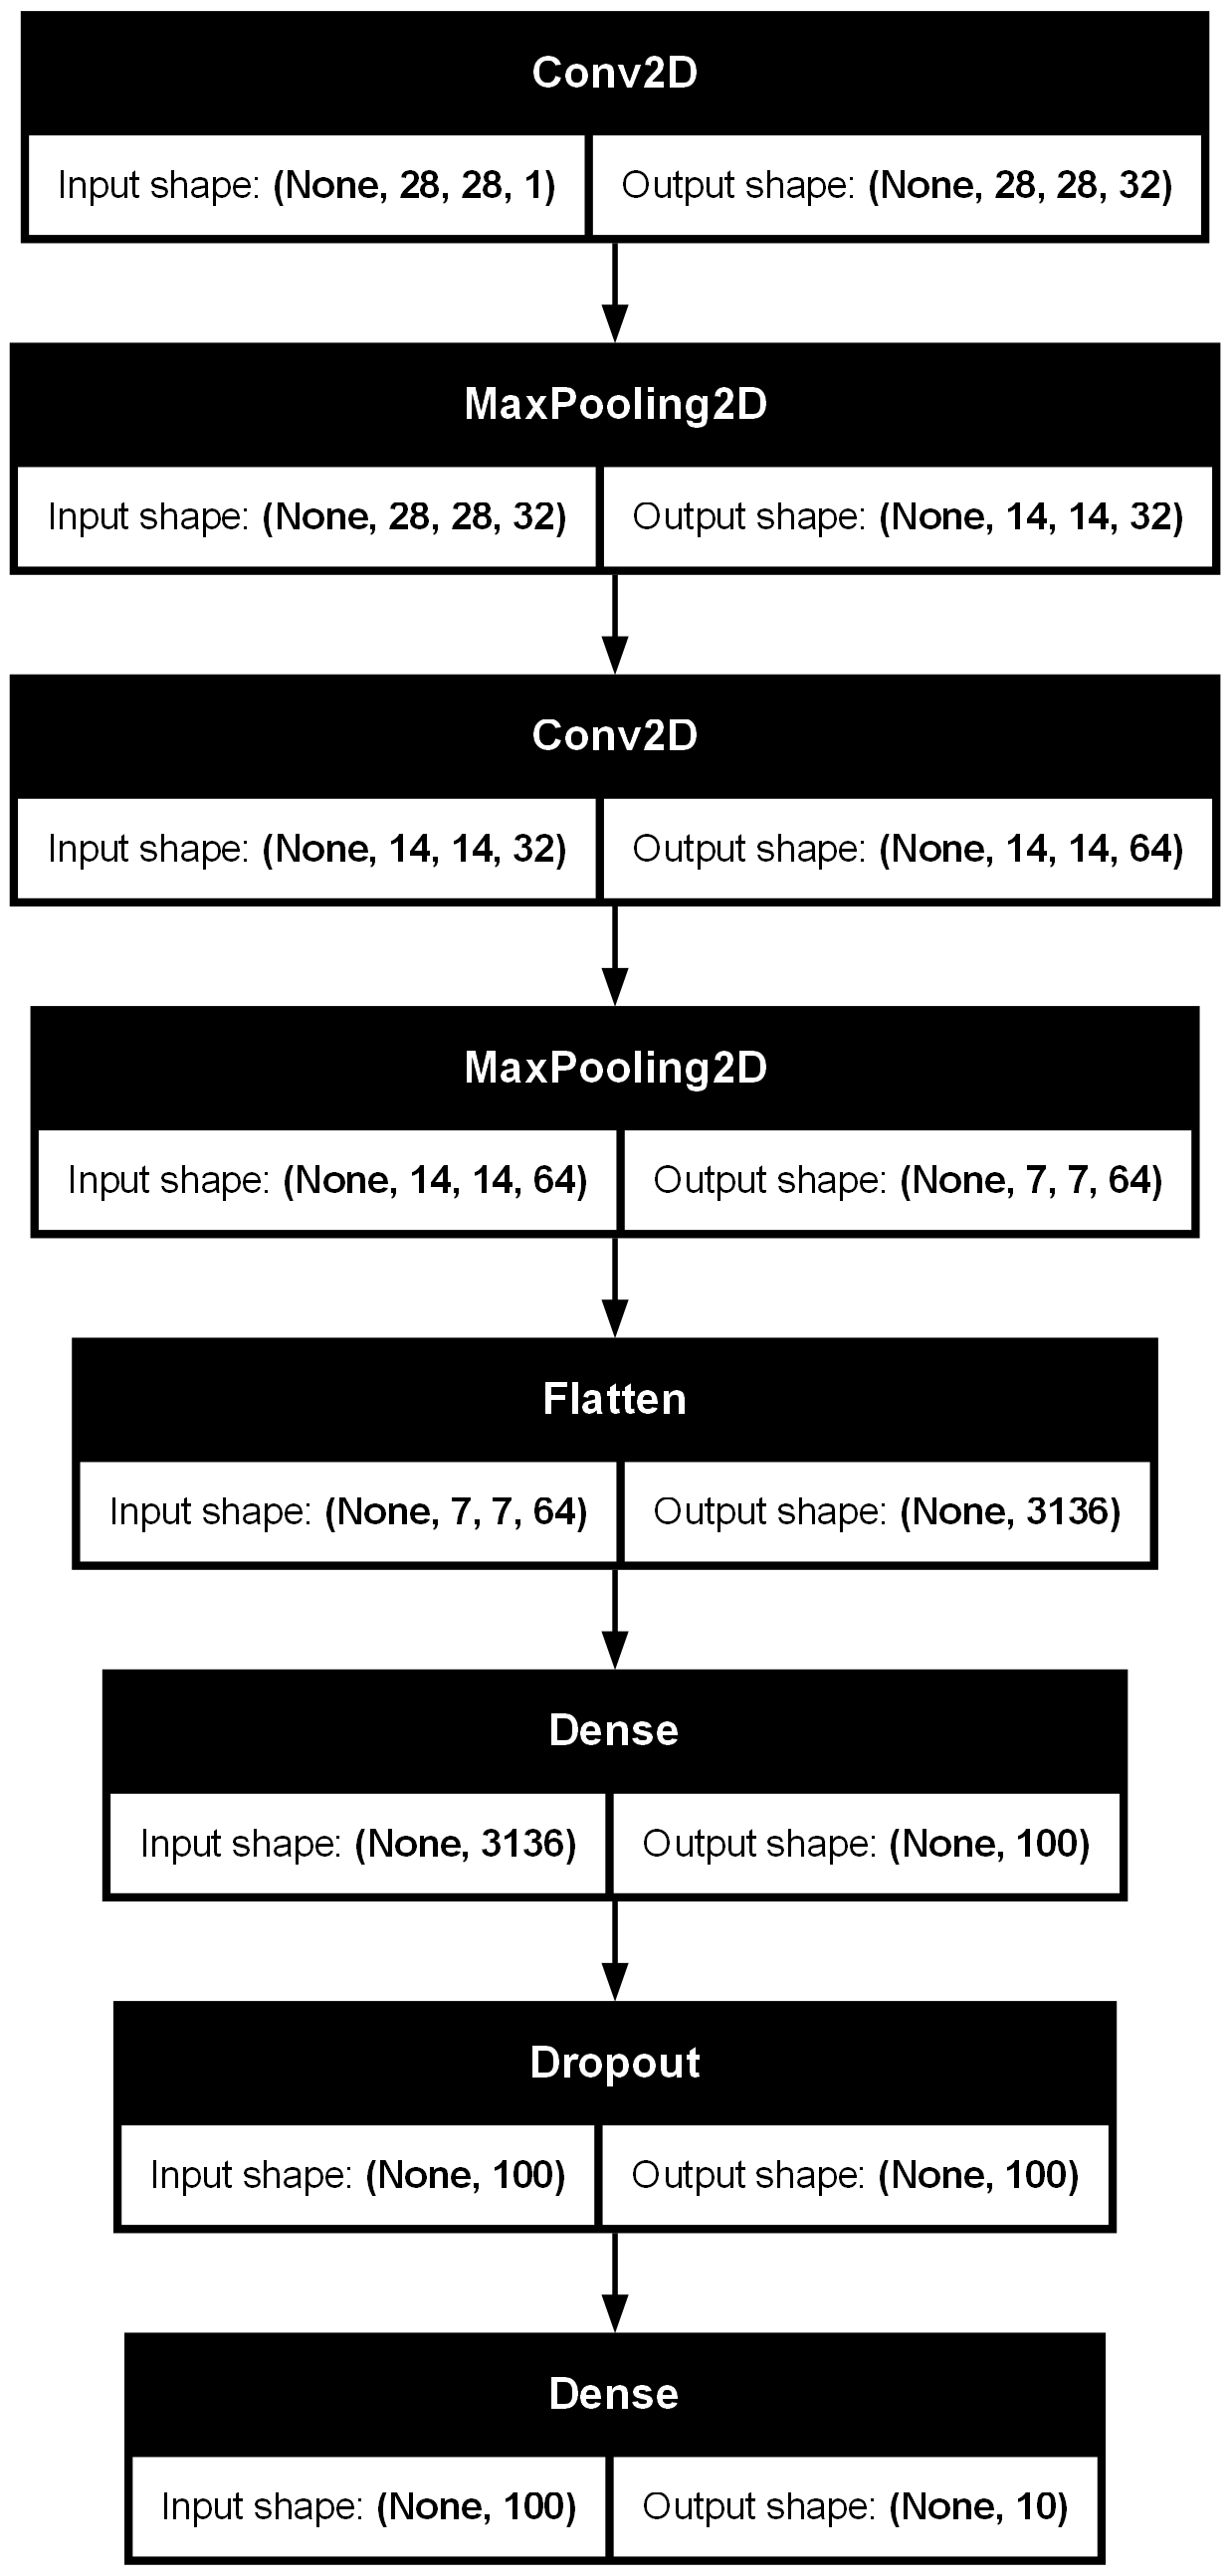

In [44]:
import pydot
from keras.utils import plot_model

# plot_model(model)
plot_model(model, show_shapes=True)
 

In [45]:
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)


In [46]:

# 모델 컴파일
# sparse_categorical_crossentropy : to_categorycal 안해도 된다.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# # 콜백 정의 patience=10
early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=2, verbose=1, 
                                        restore_best_weights=True)
modelpath = "./model/MNIST5_best_CNN_model.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_best_only=True, verbose=1)

# 모델 훈련
history = model.fit(train_scaled, train_target,
                    epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/20
1494/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7347 - loss: 0.7357
Epoch 1: val_loss improved from inf to 0.34862, saving model to ./model/MNIST5_best_CNN_model.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7350 - loss: 0.7348 - val_accuracy: 0.8723 - val_loss: 0.3486
Epoch 2/20
1495/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8690 - loss: 0.3662
Epoch 2: val_loss improved from 0.34862 to 0.28475, saving model to ./model/MNIST5_best_CNN_model.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8691 - loss: 0.3661 - val_accuracy: 0.8955 - val_loss: 0.2847
Epoch 3/20
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8898 - loss: 0.3057
Epoch 3: val_loss improved from 0.28475 to 0.26703, saving model to ./model/MNIST5_best_CNN_model.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8898 - loss: 0.3057 - val_accuracy: 0.9022 - val_loss: 0.2670
Epoch 4/20
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.

In [47]:
list (history.history)

['accuracy', 'loss', 'val_accuracy', 'val_loss']

In [48]:
# 정확도
print(history.history['accuracy'][-1])
print(history.history['loss'][-1])
print(history.history['val_accuracy'][-1])
print(history.history['val_loss'][-1])

0.9404374957084656
0.15706460177898407
0.918583333492279
0.24131359159946442


In [49]:
model.evaluate(test_input, test_target) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8714 - loss: 49.6997


[47.722042083740234, 0.8701000213623047]

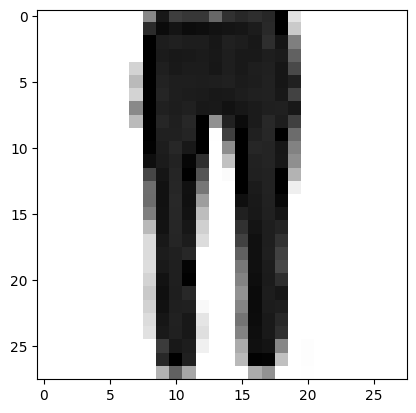

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[1.3211119e-21 3.1142814e-29 3.9496747e-25 1.3220641e-22 1.0729379e-22
  3.1537977e-19 2.2533328e-19 1.9299202e-22 1.0000000e+00 2.1967321e-25]]
가방


In [67]:
classes = [
    '티셔츠', '바치', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠'
]

import numpy as np
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r') 
plt.show()
preds = model.predict(val_scaled[0:1])
print(preds) 
print(classes[np.argmax(preds)])

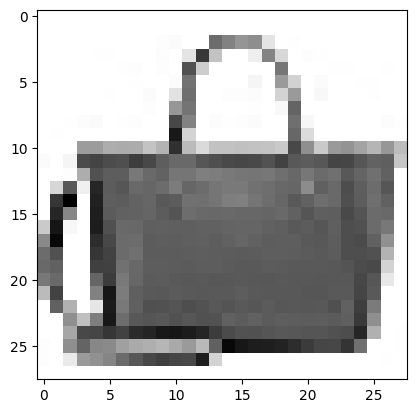

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[1.3211119e-21 3.1142814e-29 3.9496747e-25 1.3220641e-22 1.0729379e-22
  3.1537977e-19 2.2533328e-19 1.9299202e-22 1.0000000e+00 2.1967321e-25]]


In [50]:
# 평가와 예측
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r') 
plt.show()
preds = model.predict(val_scaled[0:1])
print(preds)

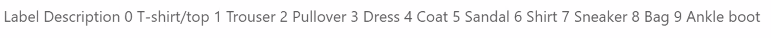

In [51]:
# 테스트 세트 점수
test_scaled = test_input.reshape(-1, 28, 28, 1).astype('float32') / 255.0
model.evaluate(test_scaled, test_target) 


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9140 - loss: 0.2505


[0.24263930320739746, 0.9172000288963318]

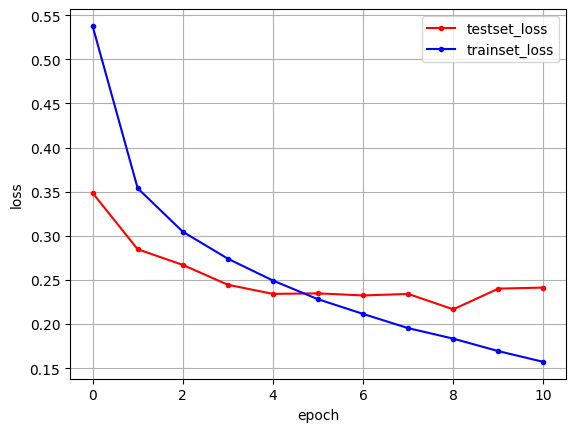

In [55]:
import numpy as np
import pandas as pd



history_df = pd.DataFrame(data=history.history)
# history_df.head()
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue' , label='trainset_loss')
plt.legend(loc=1)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss') 
plt.show()

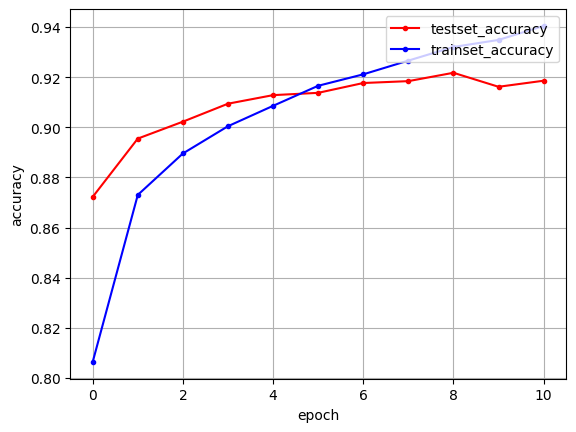

In [54]:
import numpy as np
import pandas as pd



history_df = pd.DataFrame(data=history.history)
# history_df.head()
y_val_accuracy = history.history['val_accuracy']
y_accuracy = history.history['accuracy']

x_len = np.arange(len(y_accuracy))

plt.plot(x_len, y_val_accuracy, marker='.', c='red', label='testset_accuracy')
plt.plot(x_len, y_accuracy, marker='.', c='blue' , label='trainset_accuracy')
plt.legend(loc=1)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy') 
 
plt.show()